# StatsModel — Basic

StatsModels is a Python library for statistical modeling and econometrics. It provides classes and functions for estimating various statistical models, conducting statistical tests, and exploring data. StatsModels complements SciPy and provides a more comprehensive set of tools for statistical analysis.

Key features of StatsModels include:

- Linear regression models
- Generalized linear models
- Robust linear models
- Linear mixed effects models
- Time series analysis tools
- Nonparametric methods
- Visualization of statistical model results

In this notebook, we'll explore basic usage of StatsModels for linear regression.

In [8]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

## Data Download

For this example, we'll use the Guerry dataset, a historical dataset collected by André-Michel Guerry in the 1830s. It contains data about crime, literacy, poverty, and other moral statistics for departments in France.

The dataset is accessible through StatsModels' `get_rdataset` function, which imports datasets from R packages.

The Guerry dataset includes variables such as:

- Lottery: Per capita wager on Royal Lottery
- Literacy: Percent of military conscripts who can read and write
- Wealth: Tax on personal property
- Region: Geographic region (N, E, S, W, C for North, East, South, West, Central)

In [3]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [4]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


## Preprocess

Before fitting our model, we need to ensure the data is clean. The following step drops any rows with missing values (NaN) to ensure our model receives complete data points only.

In [27]:
df = df.dropna()
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


## Formula Interface and Design Matrices

StatsModels supports a formula interface similar to R, using the Patsy library to specify models. This approach allows for a more intuitive specification of regression models.

The `dmatrices` function creates design matrices from a formula string:

- Left side of `~` specifies the dependent variable (y)
- Right side specifies the independent variables (X)
- Categorical variables (like Region) are automatically converted to dummy variables
- An intercept term is included by default

In our model, we're trying to predict `Lottery` (per capita lottery wagers) based on `Literacy`, `Wealth`, and `Region`.

In [28]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [29]:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [30]:
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


## Model Fitting and Summary

Now that we have our design matrices, we can fit an Ordinary Least Squares (OLS) regression model. The process involves two steps:

1. Create a model specification using `sm.OLS()`
2. Fit the model to the data using `.fit()`

The resulting model object contains parameter estimates and various statistics that help evaluate the model's performance.

In [31]:
mod = sm.OLS(y, X)    # Describe model
mod

In [33]:
res = mod.fit()       # Fit model
res

### Summary Results

The summary output provides comprehensive statistics about the model:

- **Coefficient estimates**: The estimated effect of each predictor on the response variable
- **Standard errors**: Measure of the statistical precision of the coefficient estimates
- **t-statistics and p-values**: Used to test the null hypothesis that a coefficient is zero
- **R-squared**: Proportion of variance in the dependent variable explained by the model
- **Adjusted R-squared**: R-squared adjusted for the number of predictors
- **F-statistic**: Tests the overall significance of the regression
- **AIC/BIC**: Information criteria for model comparison

StatsModels provides two summary methods: `summary()` and `summary2()`, each with slightly different presentation formats.

In [34]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.07e-05
Time:                        21:01:25   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.287   
Dependent Variable: Lottery          AIC:                764.5986
Date:               2025-04-18 21:01 BIC:                781.6971
No. Observations:   85               Log-Likelihood:     -375.30 
Df Model:           6                F-statistic:        6.636   
Df Residuals:       78               Prob (F-statistic): 1.07e-05
R-squared:          0.338            Scale:              436.43  
-----------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------
Intercept        38.6517   9.4563  4.0874 0.0001  19.8255 57.4778
Region[T.E]     -15.4278   9.7273 -1.5860 0.1168 -34.7934  3.9378
Region[T.N]     -10.0170   9.2603 -1.0817 0.2827 -28.4528  8.4188
Region[T.S]      -4.5483   7.2789 -0.6249 0.5339 -19.0394  9.9429
Region[T.W]     -10.0913   7.1961 -1.4023 0.1648 -24.4176  4.2351
Literacy         -0.1858   0.2098 -0.8857 0.3785  -0.6035  0.2319
Wealth            0.4515   0.1028  4.3899 0.0000   0.2467  0.6562
-----------------------------------------------------------------
Omnibus:               3.049        Durbin-Watson:          1.785
Prob(Omnibus):         0.218        Jarque-Bera (JB):       2.694
Skew:                  -0.340       Prob(JB):               0.260
Kurtosis:              2.454        Condition No.:          371  
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

### Extracting Model Parameters

After fitting the model, we can extract specific statistics for further analysis or visualization:

- `params`: Coefficient estimates for each predictor
- `rsquared`: R-squared value (goodness of fit)
- `bse`: Standard errors of the coefficient estimates
- `pvalues`: p-values for the t-tests of the coefficients
- `conf_int()`: Confidence intervals for the coefficients

These attributes allow us to easily access specific pieces of information from the model results.

In [36]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [37]:
res.rsquared

np.float64(0.337950869192882)

## Model Interpretation

When interpreting the regression results, consider the following:

1. **Coefficients**: Each coefficient represents the average change in the dependent variable (Lottery) for a one-unit increase in the predictor, holding other predictors constant.

2. **Statistical significance**: Look at p-values to determine if the relationship is statistically significant (typically p < 0.05).

3. **Effect size**: Consider not just significance but the magnitude of coefficients.

4. **Model fit**: The R-squared value indicates how much of the variation in lottery wagers is explained by our model.

5. **Categorical variables**: For Region variables (e.g., Region[T.E]), the coefficient represents the difference in the response compared to the reference category (in this case, Region C - Central).

In this model, we're investigating whether literacy rates, wealth, and geographic region can predict lottery participation rates in 19th century France.

## Plots

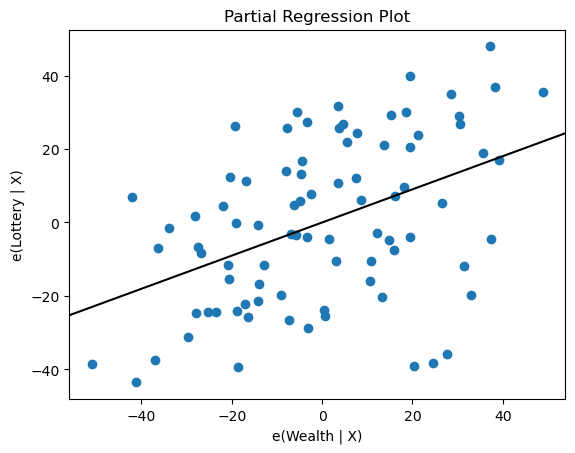

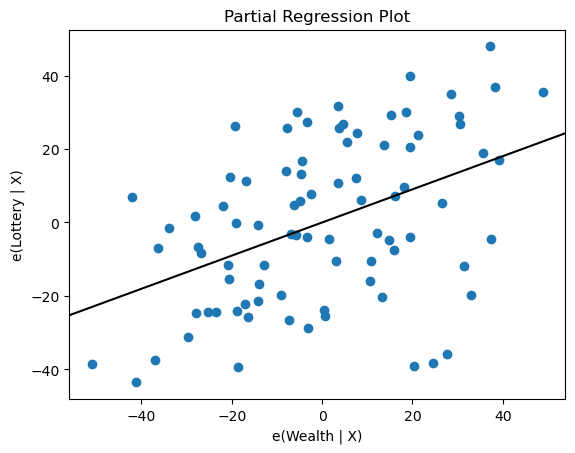

In [38]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                             data=df, obs_labels=False)

## Additional Analysis

For a more complete analysis, you might want to explore:

1. **Residual analysis**: Check if the residuals follow a normal distribution and have constant variance
2. **Outlier detection**: Identify influential observations that might be driving the results
3. **Multicollinearity**: Assess if predictors are highly correlated, which can affect coefficient estimates
4. **Model comparison**: Compare different model specifications to find the best fit
5. **Predictions**: Use the model to make predictions on new data

StatsModels provides tools for all these additional analyses.